# Polynomial Regression - Salary Prediction

* Project Scope: Analyze,Visualize and apply Polynomial Regression model to predict Salary based on position
* Data source: Position_Salaries.csv file

## Import libraries & Load data

In [4]:
# Import Data Analysis libraries
import pandas as pd
import numpy as np

# Import Data Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For display in notebook
%matplotlib inline

# Load data
dataset = pd.read_csv('Position_Salaries.csv')

## Lets check the data

In [5]:
# let check information in the CSV file
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


* We can see there are 3 Columns and its datatypes:
* Out of 3 columns, 2 are input variables/features (X), 1 output /target variable (y) 
* There are 10 rows/training examples (m)

In [6]:
# Checking for null columns
dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

we see that there are no null data in any columns

In [7]:
# lets check the data
dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


Data in this data set is self explanatory

In [8]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


this gives descriptive statistics that sumarize the central tendency of numarical columns

## Let's analyze and visualize data

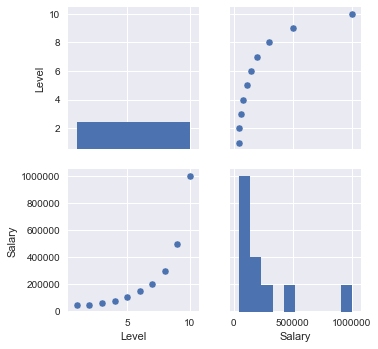

In [11]:
sns.pairplot(dataset)
plt.show()

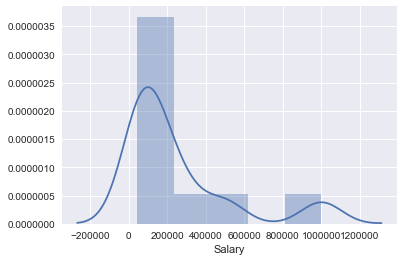

In [12]:
sns.distplot(dataset['Salary'])
plt.show()

## Spliting data into input and output variables

In [32]:
X = dataset[['Level']]
y = dataset['Salary']

In [33]:
X.shape

(10, 1)

In [34]:
y.shape

(10,)

Note that we have only one feature and corresponding output in this data set 

## Splitting the dataset into the Training set and Test set

Since data set is too small, we will not split the data

## Fitting Polynomial Regression & Evaluating the model

** Lets first try 2nd degree polynomial **

In [59]:
from sklearn.preprocessing import PolynomialFeatures

# Extracting polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Now fitting Linear Regression to new features matrix X_poly
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
X_poly

array([[   1.,    1.,    1.],
       [   1.,    2.,    4.],
       [   1.,    3.,    9.],
       [   1.,    4.,   16.],
       [   1.,    5.,   25.],
       [   1.,    6.,   36.],
       [   1.,    7.,   49.],
       [   1.,    8.,   64.],
       [   1.,    9.,   81.],
       [   1.,   10.,  100.]])

Earlier in our X (feature) matrix, we have only one feature. Now after applying polynomial features of second degree, we can notice we have 3 features- x0, x1, x2. x0 is constant, x1 is our original feature from matrix X, x2 is our new plynomial feature 

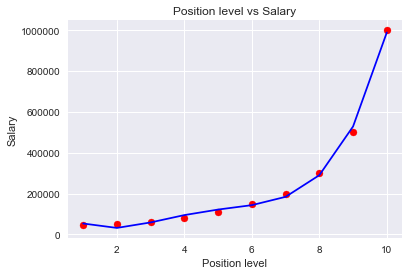

In [69]:
# Evaluating the model
plt.scatter(X,y,color='red')
plt.plot(X, lr.predict(X_poly), color='blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.title('Position level vs Salary')
plt.show()

We can see that model performed well. But for better fit, lets try 3rd degree polynomial

** Now lets try 3rd degree polynomial **

In [64]:
# We will do pretty much same steps as before, excepts we change the degree = 3
# Extracting polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Now fitting Linear Regression to new features matrix X_poly
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

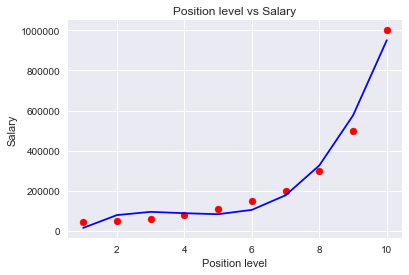

In [65]:
plt.scatter(X,y,color='red')
plt.plot(X, lr.predict(X_poly), color='blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.title('Position level vs Salary')
plt.show()

This model looks much better fit than before. Lets see how the fit looks like for 4th degree polynomial

** 4th degree polynomial **

In [67]:
# We will do pretty much same steps as before, excepts we change the degree = 4
# Extracting polynomial features
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Now fitting Linear Regression to new features matrix X_poly
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

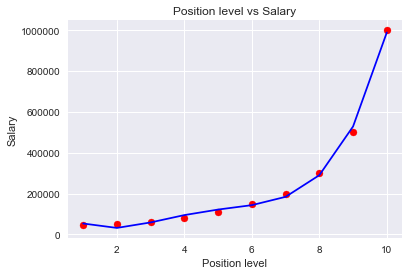

In [68]:
plt.scatter(X,y,color='red')
plt.plot(X, lr.predict(X_poly), color='blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.title('Position level vs Salary')
plt.show()

This model fits much better than before. Visualizing our predictions and actual results may not  give complete picture. As we try to fit our data best, we may get into over fitting problem. We may want to check serveral statistical measures such as explained variance score, mean absolute error, mean squared error, r-squared score to better evaluate the model

Also, to prevent over fitting, To prevent over-fitting, we can add more training samples so that the algorithm doesn’t learn the noise in the system and can become more generalized